## Zadanie domowe: morfologiczna gra w życie – John Conway

### Wykorzystanie operacji LUT w przekształceniu trafi, nie trafi
  - Szybszą metodą wykonania transformacji trafi, nie trafi może być operacja LUT.
  - Technika polega na zakodowaniu wyników wszystkich interesujących  konfiguracji, a następnie podczas przetwarzania wykorzystania operacji LUT.
  - Dla otoczenia 3x3 możliwe jest 512 różnych konfiguracji.
  - Aby praktycznie zrealizować operacje, każdej konfiguracji należy nadać unikalny indeks. Jedną z możliwości jest pomnożenie elementu strukturalnego przez macierz (mnożenie odpowiednich elementów):
  ```
  [[1, 8,  64],
   [ 2, 16, 128],
   [ 4, 32, 256]]
  ```
  Przykładowo elementowi:
  ```
  [[1, 1, 0],
   [ 1, 0, 1],
   [ 1, 0, 1]]
  ```
  odpowiada liczba: 1(1) + 2(1) + 4(1) + 8(1) + 128(1) + 256(1) = 399.
  
### Przykład działania metody – detekcja punktów końcowych na obrazie.
  - założenie: punkt końcowy to punkt, który ma dokładnie jednego sąsiada,
  - zdefiniuj funkcję, która jako argument pobiera otoczenie, a zwraca 0 lub 1 w zależności od tego, czy rozpatrywany punkt jest końcowy np. dla sąsiedztwa 3×3 punkt będzie końcowy, jeżeli jest zapalony i ma tylko jednego sąsiada (czyli suma pikseli jest równa 2).
  - wygeneruj przekodowanie LUT.
  - wczytaj obraz szkielet.bmp (należy go przekształcić, aby uzyskać dwuwymiarową tablicę o wartościach 0-1). Wykorzystując wygenerowane przekodowanie LUT wykonaj detekcję zakończeń. Wyświetl obraz oryginalny i po przekodowaniu LUT.

### Gra w życie

Reguły gry w życie:
  - każdy piksel biały, który ma dwóch lub trzech sąsiadów (białych) przeżywa,
  - każdy piksel biały, który ma 0,1 lub więcej niż trzech sąsiadów (białych) nie przeżywa (głód lub przeludnienie),
  - jeżeli jakieś pole (czarne) sąsiaduje dokładnie z trzema pikselami białymi, to na tym polu ,,rodzi'' się nowy piksel biały.

Zadanie:
  - za pomocą mechanizmu LUT (opisanego wcześniej) należy zaimplementować morfologiczną gre w życie,
  - najważniejszym elementem jest funkcja opisująca reguły gry,
  - symulacje należny przeprowadzić dla plansz dostarczonych w pliku gra.py,
  - dobrze jest wykonać kilka iteracji – zobaczyć jak zmienia się kształt,
  - inne ciekawe kształty do znalezienia w internecie.


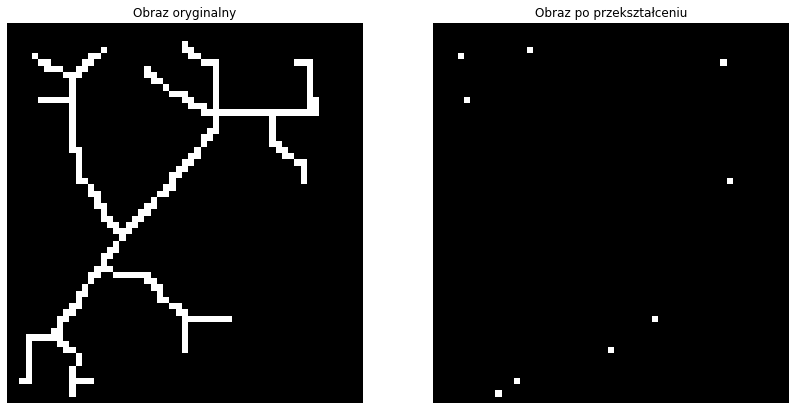

In [1]:
import matplotlib.pyplot as plt
import cv2
import numpy as np
import os

if not os.path.exists("gra.py") :
    !wget https://raw.githubusercontent.com/vision-agh/poc_sw/master/10_Morfologia/gra.py --no-check-certificate


plansza1 = np.array([
    [0,	0,	0,	0,	0,	0,	0,	0,	0,	0],
    [0,	0,	0,	0,	0,	0,	0,	0,	0,	0],
    [0,	0,	0,	1,	0,	0,	1,	0,	0,	0],
    [0,	0,	0,	1,	1,	1,	1,	0,	0,	0],
    [0,	0,	1,	0,	0,	0,	0,	1,	0,	0],
    [0,	0,	1,	0,	1,	1,	0,	1,	0,	0],
    [0,	0,	1,	0,	0,	0,	0,	1,	0,	0],
    [0,	0,	0,	1,	1,	1,	1,	0,	0,	0],
    [0,	0,	0,	0,	0,	0,	0,	0,	0,	0],
    [0,	0,	0,	0,	0,	0,	0,	0,	0,	0]], np.uint8)

plansza2 = np.array([
    [0,	1,	0,	0,	0,	0,	0,	0,	0,	0,	0,	0,	0,	0,	1,	1],
    [0,	0,	1,	0,	0,	0,	0,	0,	0,	0,	0,	0,	0,	0,	1,	1],
    [1,	1,	1,	0,	0,	0,	0,	0,	0,	0,	0,	0,	0,	0,	0,	0],
    [0,	0,	0,	0,	0,	0,	0,	0,	0,	0,	0,	0,	0,	0,	0,	0],
    [0,	0,	0,	0,	0,	0,	0,	0,	0,	0,	0,	0,	0,	0,	0,	0],
    [0,	0,	0,	0,	0,	0,	0,	0,	0,	0,	0,	0,	0,	0,	0,	0],
    [0,	0,	0,	0,	0,	0,	0,	0,	0,	0,	0,	0,	0,	0,	0,	0],
    [0,	0,	0,	0,	0,	0,	0,	0,	0,	0,	0,	0,	0,	0,	0,	0],
    [0,	0,	0,	0,	0,	0,	0,	0,	0,	0,	0,	0,	0,	0,	0,	0],
    [0,	0,	0,	0,	0,	0,	0,	0,	0,	0,	0,	0,	0,	0,	0,	0],
    [0,	0,	0,	0,	0,	0,	0,	0,	0,	0,	0,	0,	0,	0,	0,	0],
    [0,	0,	0,	0,	0,	0,	0,	0,	0,	0,	0,	0,	0,	0,	0,	0],
    [0,	0,	0,	0,	0,	0,	0,	0,	0,	0,	0,	0,	0,	0,	0,	0]], np.uint8)

szkielet = cv2.imread('szkielet.bmp', cv2.IMREAD_GRAYSCALE)

def end_point(surr):
    if surr[1, 1] == 1:
        if np.sum(surr) == 2:
            return 1
        else:
            return 0
    return 0

def lut(img):
    img = img/255
    X, Y = img.shape
    result = img.copy()

    lut = []
    for i in range(0, 511):
        neighbour = np.array(list("{0:09b}".format(i)), 'uint8', order='F')
        neighbour = np.reshape(neighbour, (3, 3))
        lut.append(end_point(neighbour))

    m = np.array([[1, 8,  64], [2, 16, 128], [4, 32, 256]])
    
    for i in range(1, X - 1):
        for j in range(1, Y - 1):
            surr = img[i-1: i+2, j-1: j+2]
            idx = np.multiply(surr, m)
            idx = int(np.sum(idx))
            result[i, j] = lut[idx]

    return result


def lut_disp(img):
    result = lut(img)

    fig, ax = plt.subplots(1, 2)
    fig.set_size_inches(14, 7)
    ax[0].imshow(img, cmap='gray', vmin=0, vmax=256)
    ax[0].set_title("Obraz oryginalny")
    ax[0].axis("off")

    ax[1].imshow(result, cmap='gray')
    ax[1].set_title("Obraz po przekształceniu")
    ax[1].axis("off")

    plt.show()

lut_disp(szkielet)

In [2]:
def rules(surr):
    if surr[1, 1] == 1:
        if np.sum(surr) == 3 or np.sum(surr) == 4:
            return 1
    else:
        if np.sum(surr) == 3:
            return 1
    return 0

def life_game(img):
    result = img.copy()
    X, Y = img.shape
    lut = []
    for i in range(0, 511):
        neighbour = np.array(list("{0:09b}".format(i)), 'uint8', order='F')
        neighbour = np.reshape(neighbour, (3, 3))
        lut.append(rules(neighbour))

    m = np.array([[1, 8,  64], [2, 16, 128], [4, 32, 256]])

    for i in range(1, X - 1):
        for j in range(1, Y - 1):
            surr = img[i-1: i+2, j-1: j+2]
            idx = np.multiply(surr, m)
            idx = int(np.sum(idx))
            result[i, j] = lut[idx]

    return result

In [9]:
def disp_and_iter_life_game(img):
    itr = life_game(img)
    fig, ax = plt.subplots(2, 3)
    fig.set_size_inches(21, 14)
    ax[0, 0].imshow(img, cmap='gray')
    ax[0, 0].set_title("Obraz oryginalny")
    ax[0, 0].axis("off")
    r = 0
    for i in range(1, 6):
        if i >= 3:
            r = 1
            c = i - 3
        else:
            c = i
        ax[r, c].imshow(itr, cmap='gray')
        ax[r, c].set_title(str(i) + " iteracja")
        ax[r, c].axis("off")

        itr = life_game(itr)

    plt.show()

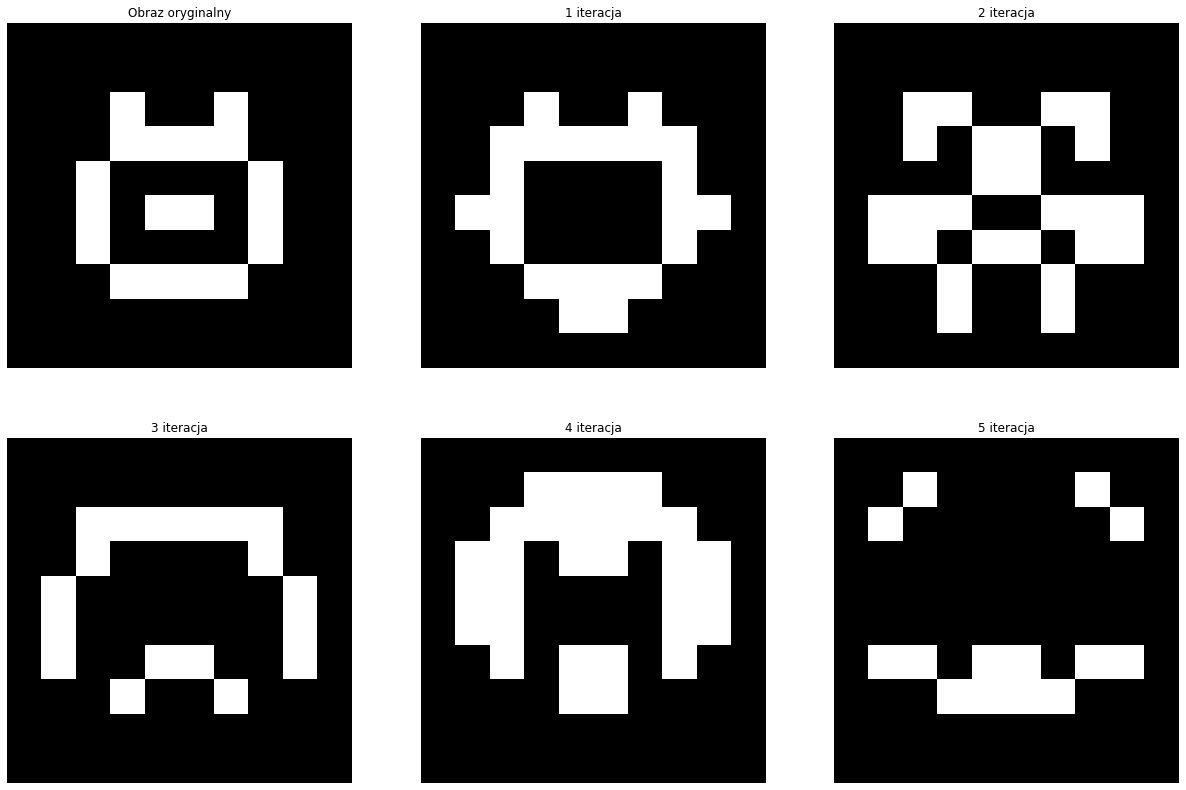

In [10]:
disp_and_iter_life_game(plansza1)

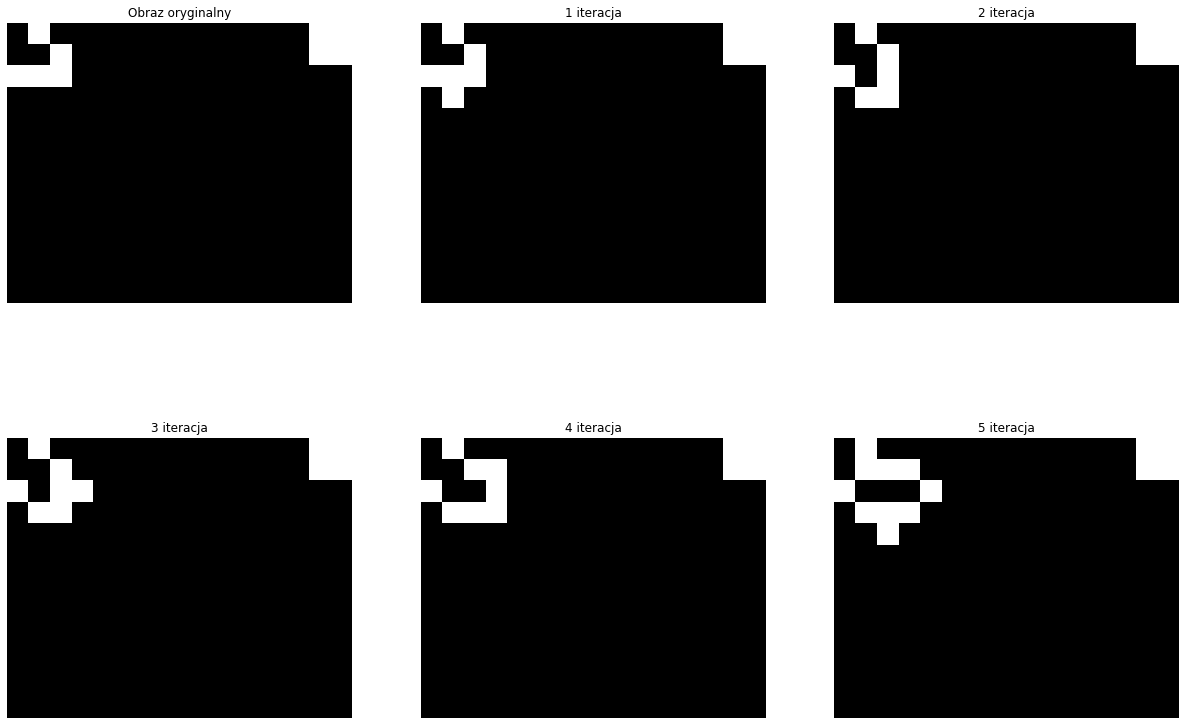

In [11]:
disp_and_iter_life_game(plansza2)